# Controlling Burgers' Equation with Reinforcement Learning
This notebook will demonstrate how reinforcement learning can be used to control Burgers' equation, a nonlinear PDE. The approach uses the reinforcement learning framework [stable_baselines3](https://github.com/DLR-RM/stable-baselines3) and the differentiable PDE solver [Φ<sub>Flow</sub>](https://github.com/tum-pbs/PhiFlow). As a reinforcement learning algorithm, [PPO](https://arxiv.org/abs/1707.06347v2) was selected.

In [1]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../../'); sys.path.append('../envs'); sys.path.append('../../PDE-Control/PhiFlow'); sys.path.append('../../PDE-Control/src')
from phi.flow import *
import matplotlib.pyplot as plt
import burgers_plots as bplt
from experiment import BurgersTraining

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWarning:

Passing (type, 1) or '1type' as a synony

## Reinforcement Learning Initialization

In [2]:
domain = Domain([32], box=box[0:1]) # 1d grid resolution and physical size
viscosity = 0.003 # viscosity constant for Burgers' equation
step_count = 32 # length of each trajectory
dt = 0.03 # time step size
diffusion_substeps = 1 # how many diffusion steps to perform at each solver step

n_envs = 10 # On how many environments to train in parallel, load balancing
final_reward_factor = step_count # How hard to punish the agent for not reaching the goal if that is the case
steps_per_rollout = step_count * 10 # How many steps to collect per environment between agent updates
training_timesteps = steps_per_rollout * 1000 # How long the actual training should be
n_epochs = 10 # How many epochs to perform during agent update
learning_rate = 1e-4 # Learning rate for agent updates
batch_size = 128 # Batch size for agent updates
test_path = 'forced-burgers-clash' # Path of the used test set for comparison to cfe method
test_range = range(100) # Test samples inside the dataset

To start training, we create a trainer object, which manages the environment and the agent internally. Additionally, a directory for storing models, logs, and hyperparameters is created. This way, training can be continued at any later point using the same configuration. If the model folder specified in `exp_name` already exists, the agent within is loaded. Otherwise, a new agent is created

In [3]:
trainer = BurgersTraining(
    exp_name='ControlBurgersBench3',
    domain=domain,
    viscosity=viscosity,
    step_count=step_count,
    dt=dt,
    diffusion_substeps=diffusion_substeps,
    n_envs=n_envs,
    final_reward_factor=final_reward_factor,
    steps_per_rollout=steps_per_rollout,
    n_epochs=n_epochs,
    learning_rate=learning_rate,
    batch_size=batch_size,
    test_path=test_path,
    test_range=range(100),
)

{'num_envs': 100, 'step_count': 32, 'domain': ([32], size=[1.]), 'dt': 0.03, 'viscosity': 0.003, 'diffusion_substeps': 1, 'final_reward_factor': 32, 'exp_name': 'ControlBurgersBench3'}
Using new running mean for reward
Creating new agent...
Using cuda device


Now we are set up to start training the agent. The next line will take quite some time to execute, so grab a coffee or take your dog for a walk or so.

`n_rollouts` denotes the length of the training

`save_freq` specifies the number of epochs after which the stored model is overwritten

In [4]:
trainer.train(n_rollouts=1001, save_freq=50)

Logging to rl-models/ControlBurgersBench3/tensorboard-log/PPO_1


/home/felix/anaconda3/envs/phiflow/lib/python3.6/site-packages/torch/nn/functional.py:2506: UserWarning:

Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.



Forces on test set: 34475.214303
Storing agent and hyperparameters to disk...
-----------------------------------
| forces             | 1128.4204  |
| rew_unnormalized   | -257414.78 |
| rollout/           |            |
|    ep_len_mean     | 32.0       |
|    ep_rew_mean     | -0.8588431 |
| test set forces    | 3.45e+04   |
| time/              |            |
|    fps             | 664        |
|    iterations      | 1          |
|    time_elapsed    | 4          |
|    total_timesteps | 3200       |
-----------------------------------
Forces on test set: 35901.755936
-----------------------------------------
| forces                  | 1149.8523   |
| rew_unnormalized        | -272125.6   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | -0.10022798 |
| test set forces         | 3.59e+04    |
| time/                   |             |
|    fps                  | 364         |
|    iterations           | 2           |
|

Forces on test set: 39451.212433
-----------------------------------------
| forces                  | 1138.9465   |
| rew_unnormalized        | -250048.45  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 0.22642967  |
| test set forces         | 3.95e+04    |
| time/                   |             |
|    fps                  | 272         |
|    iterations           | 10          |
|    time_elapsed         | 117         |
|    total_timesteps      | 32000       |
| train/                  |             |
|    approx_kl            | 0.006761192 |
|    clip_fraction        | 0.0524      |
|    clip_range           | 0.2         |
|    entropy_loss         | -45.4       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.179       |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00853    |
|    std                  | 1           |
|

Forces on test set: 39180.877228
-----------------------------------------
| forces                  | 1143.0093   |
| rew_unnormalized        | -247435.9   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 0.16410738  |
| test set forces         | 3.92e+04    |
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 18          |
|    time_elapsed         | 216         |
|    total_timesteps      | 57600       |
| train/                  |             |
|    approx_kl            | 0.006615949 |
|    clip_fraction        | 0.054       |
|    clip_range           | 0.2         |
|    entropy_loss         | -45.4       |
|    explained_variance   | 0.984       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0484      |
|    n_updates            | 170         |
|    policy_gradient_loss | -0.0119     |
|    std                  | 0.999       |
|

Forces on test set: 41053.994324
----------------------------------------
| forces                  | 1079.5698  |
| rew_unnormalized        | -180460.95 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.0169661  |
| test set forces         | 4.11e+04   |
| time/                   |            |
|    fps                  | 260        |
|    iterations           | 26         |
|    time_elapsed         | 319        |
|    total_timesteps      | 83200      |
| train/                  |            |
|    approx_kl            | 0.01747452 |
|    clip_fraction        | 0.159      |
|    clip_range           | 0.2        |
|    entropy_loss         | -45.3      |
|    explained_variance   | 0.986      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00311   |
|    n_updates            | 250        |
|    policy_gradient_loss | -0.0208    |
|    std                  | 0.995      |
|    value_loss         

Forces on test set: 44470.419556
-----------------------------------------
| forces                  | 1018.01086  |
| rew_unnormalized        | -105792.91  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.9747342   |
| test set forces         | 4.45e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 34          |
|    time_elapsed         | 420         |
|    total_timesteps      | 108800      |
| train/                  |             |
|    approx_kl            | 0.009622234 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -45.1       |
|    explained_variance   | 0.983       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.00881     |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.0148     |
|    std                  | 0.99        |
|

Forces on test set: 47224.572937
-----------------------------------------
| forces                  | 993.92737   |
| rew_unnormalized        | -62884.203  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.5063138   |
| test set forces         | 4.72e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 42          |
|    time_elapsed         | 521         |
|    total_timesteps      | 134400      |
| train/                  |             |
|    approx_kl            | 0.014483004 |
|    clip_fraction        | 0.158       |
|    clip_range           | 0.2         |
|    entropy_loss         | -45         |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0157      |
|    n_updates            | 410         |
|    policy_gradient_loss | -0.0175     |
|    std                  | 0.989       |
|

Forces on test set: 49458.845093
-----------------------------------------
| forces                  | 1020.7859   |
| rew_unnormalized        | -58691.28   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.341795    |
| test set forces         | 4.95e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 50          |
|    time_elapsed         | 621         |
|    total_timesteps      | 160000      |
| train/                  |             |
|    approx_kl            | 0.011517202 |
|    clip_fraction        | 0.173       |
|    clip_range           | 0.2         |
|    entropy_loss         | -45         |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0375      |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.0141     |
|    std                  | 0.986       |
|

Forces on test set: 50503.246704
-----------------------------------------
| forces                  | 1023.4192   |
| rew_unnormalized        | -44283.44   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.4528108   |
| test set forces         | 5.05e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 58          |
|    time_elapsed         | 718         |
|    total_timesteps      | 185600      |
| train/                  |             |
|    approx_kl            | 0.008271699 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.9       |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0241      |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.0116     |
|    std                  | 0.984       |
|

Forces on test set: 52202.504517
-----------------------------------------
| forces                  | 982.75195   |
| rew_unnormalized        | -23193.293  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.7600098   |
| test set forces         | 5.22e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 66          |
|    time_elapsed         | 817         |
|    total_timesteps      | 211200      |
| train/                  |             |
|    approx_kl            | 0.022718223 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.964       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00398    |
|    n_updates            | 650         |
|    policy_gradient_loss | -0.0103     |
|    std                  | 0.98        |
|

Forces on test set: 52400.285645
-----------------------------------------
| forces                  | 992.7949    |
| rew_unnormalized        | -20050.932  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.6826942   |
| test set forces         | 5.24e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 74          |
|    time_elapsed         | 916         |
|    total_timesteps      | 236800      |
| train/                  |             |
|    approx_kl            | 0.013054024 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.961       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0111     |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.0147     |
|    std                  | 0.977       |
|

Forces on test set: 53264.921631
-----------------------------------------
| forces                  | 1015.98456  |
| rew_unnormalized        | -19140.021  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.568291    |
| test set forces         | 5.33e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 82          |
|    time_elapsed         | 1016        |
|    total_timesteps      | 262400      |
| train/                  |             |
|    approx_kl            | 0.015888173 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0129     |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.0108     |
|    std                  | 0.978       |
|

Forces on test set: 53885.809937
----------------------------------------
| forces                  | 1019.0945  |
| rew_unnormalized        | -17339.52  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 2.495679   |
| test set forces         | 5.39e+04   |
| time/                   |            |
|    fps                  | 258        |
|    iterations           | 90         |
|    time_elapsed         | 1114       |
|    total_timesteps      | 288000     |
| train/                  |            |
|    approx_kl            | 0.01871583 |
|    clip_fraction        | 0.206      |
|    clip_range           | 0.2        |
|    entropy_loss         | -44.6      |
|    explained_variance   | 0.961      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0208    |
|    n_updates            | 890        |
|    policy_gradient_loss | -0.0145    |
|    std                  | 0.976      |
|    value_loss         

Forces on test set: 55109.399658
-----------------------------------------
| forces                  | 986.4423    |
| rew_unnormalized        | -19054.746  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.338656    |
| test set forces         | 5.51e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 98          |
|    time_elapsed         | 1211        |
|    total_timesteps      | 313600      |
| train/                  |             |
|    approx_kl            | 0.014375605 |
|    clip_fraction        | 0.181       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.6       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.000202   |
|    n_updates            | 970         |
|    policy_gradient_loss | -0.0138     |
|    std                  | 0.977       |
|

Forces on test set: 55262.028931
-----------------------------------------
| forces                  | 991.87225   |
| rew_unnormalized        | -14232.466  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.3896701   |
| test set forces         | 5.53e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 106         |
|    time_elapsed         | 1310        |
|    total_timesteps      | 339200      |
| train/                  |             |
|    approx_kl            | 0.020462127 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0218      |
|    n_updates            | 1050        |
|    policy_gradient_loss | -0.0124     |
|    std                  | 0.978       |
|

Forces on test set: 55236.694824
-----------------------------------------
| forces                  | 1005.1317   |
| rew_unnormalized        | -16045.173  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.2506626   |
| test set forces         | 5.52e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 114         |
|    time_elapsed         | 1406        |
|    total_timesteps      | 364800      |
| train/                  |             |
|    approx_kl            | 0.019611582 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0177      |
|    n_updates            | 1130        |
|    policy_gradient_loss | -0.00953    |
|    std                  | 0.978       |
|

Forces on test set: 54514.171997
-----------------------------------------
| forces                  | 998.53345   |
| rew_unnormalized        | -14388.104  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.2276075   |
| test set forces         | 5.45e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 122         |
|    time_elapsed         | 1505        |
|    total_timesteps      | 390400      |
| train/                  |             |
|    approx_kl            | 0.017227631 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.8       |
|    explained_variance   | 0.944       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.023      |
|    n_updates            | 1210        |
|    policy_gradient_loss | -0.0113     |
|    std                  | 0.981       |
|

Forces on test set: 54909.563110
-----------------------------------------
| forces                  | 1018.39575  |
| rew_unnormalized        | -17456.1    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.0554702   |
| test set forces         | 5.49e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 130         |
|    time_elapsed         | 1605        |
|    total_timesteps      | 416000      |
| train/                  |             |
|    approx_kl            | 0.012845023 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.8       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.03       |
|    n_updates            | 1290        |
|    policy_gradient_loss | -0.0129     |
|    std                  | 0.982       |
|

Forces on test set: 55486.593628
-----------------------------------------
| forces                  | 996.16125   |
| rew_unnormalized        | -15133.249  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.0698094   |
| test set forces         | 5.55e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 138         |
|    time_elapsed         | 1704        |
|    total_timesteps      | 441600      |
| train/                  |             |
|    approx_kl            | 0.013696295 |
|    clip_fraction        | 0.177       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00907    |
|    n_updates            | 1370        |
|    policy_gradient_loss | -0.0113     |
|    std                  | 0.98        |
|

Forces on test set: 57124.735474
-----------------------------------------
| forces                  | 1017.74084  |
| rew_unnormalized        | -12583.335  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 2.1014967   |
| test set forces         | 5.71e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 146         |
|    time_elapsed         | 1802        |
|    total_timesteps      | 467200      |
| train/                  |             |
|    approx_kl            | 0.013322771 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.6       |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00502    |
|    n_updates            | 1450        |
|    policy_gradient_loss | -0.0154     |
|    std                  | 0.976       |
|

Forces on test set: 57421.026978
-----------------------------------------
| forces                  | 993.5383    |
| rew_unnormalized        | -15076.657  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.9571131   |
| test set forces         | 5.74e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 154         |
|    time_elapsed         | 1901        |
|    total_timesteps      | 492800      |
| train/                  |             |
|    approx_kl            | 0.015532826 |
|    clip_fraction        | 0.204       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.7       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.00952     |
|    n_updates            | 1530        |
|    policy_gradient_loss | -0.0138     |
|    std                  | 0.978       |
|

Forces on test set: 57186.386597
-----------------------------------------
| forces                  | 987.1507    |
| rew_unnormalized        | -12823.915  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.9892874   |
| test set forces         | 5.72e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 162         |
|    time_elapsed         | 2000        |
|    total_timesteps      | 518400      |
| train/                  |             |
|    approx_kl            | 0.016573658 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.6       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0164      |
|    n_updates            | 1610        |
|    policy_gradient_loss | -0.0128     |
|    std                  | 0.976       |
|

Forces on test set: 57712.329590
-----------------------------------------
| forces                  | 1019.12756  |
| rew_unnormalized        | -15076.881  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.8571293   |
| test set forces         | 5.77e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 170         |
|    time_elapsed         | 2098        |
|    total_timesteps      | 544000      |
| train/                  |             |
|    approx_kl            | 0.011948144 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.5       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00812    |
|    n_updates            | 1690        |
|    policy_gradient_loss | -0.0124     |
|    std                  | 0.973       |
|

Forces on test set: 58480.951904
-----------------------------------------
| forces                  | 1029.9027   |
| rew_unnormalized        | -12766.921  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.9016849   |
| test set forces         | 5.85e+04    |
| time/                   |             |
|    fps                  | 259         |
|    iterations           | 178         |
|    time_elapsed         | 2198        |
|    total_timesteps      | 569600      |
| train/                  |             |
|    approx_kl            | 0.011628658 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.4       |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0103     |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.0132     |
|    std                  | 0.968       |
|

Forces on test set: 58507.533936
-----------------------------------------
| forces                  | 1016.7993   |
| rew_unnormalized        | -13432.699  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.8340709   |
| test set forces         | 5.85e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 186         |
|    time_elapsed         | 2300        |
|    total_timesteps      | 595200      |
| train/                  |             |
|    approx_kl            | 0.019177591 |
|    clip_fraction        | 0.184       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.3       |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0204     |
|    n_updates            | 1850        |
|    policy_gradient_loss | -0.0156     |
|    std                  | 0.968       |
|

Forces on test set: 58965.996826
-----------------------------------------
| forces                  | 1023.8152   |
| rew_unnormalized        | -14331.089  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.7575998   |
| test set forces         | 5.9e+04     |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 194         |
|    time_elapsed         | 2401        |
|    total_timesteps      | 620800      |
| train/                  |             |
|    approx_kl            | 0.021292599 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.2       |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00847    |
|    n_updates            | 1930        |
|    policy_gradient_loss | -0.0193     |
|    std                  | 0.965       |
|

Forces on test set: 59564.854858
-----------------------------------------
| forces                  | 1035.5043   |
| rew_unnormalized        | -13698.116  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.7453232   |
| test set forces         | 5.96e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 202         |
|    time_elapsed         | 2501        |
|    total_timesteps      | 646400      |
| train/                  |             |
|    approx_kl            | 0.013044726 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.1       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0253     |
|    n_updates            | 2010        |
|    policy_gradient_loss | -0.0146     |
|    std                  | 0.962       |
|

Forces on test set: 60516.279419
----------------------------------------
| forces                  | 1045.0066  |
| rew_unnormalized        | -13315.622 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.7256589  |
| test set forces         | 6.05e+04   |
| time/                   |            |
|    fps                  | 258        |
|    iterations           | 210        |
|    time_elapsed         | 2602       |
|    total_timesteps      | 672000     |
| train/                  |            |
|    approx_kl            | 0.01541491 |
|    clip_fraction        | 0.219      |
|    clip_range           | 0.2        |
|    entropy_loss         | -44.1      |
|    explained_variance   | 0.863      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00362   |
|    n_updates            | 2090       |
|    policy_gradient_loss | -0.0144    |
|    std                  | 0.96       |
|    value_loss         

Forces on test set: 60133.840210
-----------------------------------------
| forces                  | 1033.0038   |
| rew_unnormalized        | -13467.445  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.6868001   |
| test set forces         | 6.01e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 218         |
|    time_elapsed         | 2702        |
|    total_timesteps      | 697600      |
| train/                  |             |
|    approx_kl            | 0.018794045 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.1       |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00412    |
|    n_updates            | 2170        |
|    policy_gradient_loss | -0.014      |
|    std                  | 0.961       |
|

Forces on test set: 59105.410278
-----------------------------------------
| forces                  | 1014.1953   |
| rew_unnormalized        | -12498.577  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.6976578   |
| test set forces         | 5.91e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 226         |
|    time_elapsed         | 2801        |
|    total_timesteps      | 723200      |
| train/                  |             |
|    approx_kl            | 0.022304477 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44.1       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00519    |
|    n_updates            | 2250        |
|    policy_gradient_loss | -0.016      |
|    std                  | 0.961       |
|

Forces on test set: 58854.263306
-----------------------------------------
| forces                  | 1006.55774  |
| rew_unnormalized        | -11521.505  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.7103891   |
| test set forces         | 5.89e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 234         |
|    time_elapsed         | 2901        |
|    total_timesteps      | 748800      |
| train/                  |             |
|    approx_kl            | 0.019091025 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -44         |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0236     |
|    n_updates            | 2330        |
|    policy_gradient_loss | -0.0167     |
|    std                  | 0.959       |
|

Forces on test set: 60075.841431
-----------------------------------------
| forces                  | 1020.26666  |
| rew_unnormalized        | -11078.996  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.7020006   |
| test set forces         | 6.01e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 242         |
|    time_elapsed         | 2999        |
|    total_timesteps      | 774400      |
| train/                  |             |
|    approx_kl            | 0.027251037 |
|    clip_fraction        | 0.209       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.9       |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.016      |
|    n_updates            | 2410        |
|    policy_gradient_loss | -0.0152     |
|    std                  | 0.956       |
|

Forces on test set: 60591.338501
-----------------------------------------
| forces                  | 1014.5118   |
| rew_unnormalized        | -11161.753  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.6706096   |
| test set forces         | 6.06e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 250         |
|    time_elapsed         | 3098        |
|    total_timesteps      | 800000      |
| train/                  |             |
|    approx_kl            | 0.012825675 |
|    clip_fraction        | 0.219       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.8       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00119    |
|    n_updates            | 2490        |
|    policy_gradient_loss | -0.0153     |
|    std                  | 0.952       |
|

Forces on test set: 61079.723511
-----------------------------------------
| forces                  | 1009.13477  |
| rew_unnormalized        | -11911.983  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.6086113   |
| test set forces         | 6.11e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 258         |
|    time_elapsed         | 3196        |
|    total_timesteps      | 825600      |
| train/                  |             |
|    approx_kl            | 0.020595532 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.8       |
|    explained_variance   | 0.9         |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0218      |
|    n_updates            | 2570        |
|    policy_gradient_loss | -0.0137     |
|    std                  | 0.951       |
|

Forces on test set: 60810.570679
-----------------------------------------
| forces                  | 1013.2134   |
| rew_unnormalized        | -10339.498  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.657388    |
| test set forces         | 6.08e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 266         |
|    time_elapsed         | 3295        |
|    total_timesteps      | 851200      |
| train/                  |             |
|    approx_kl            | 0.020551238 |
|    clip_fraction        | 0.201       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.6       |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0284     |
|    n_updates            | 2650        |
|    policy_gradient_loss | -0.0183     |
|    std                  | 0.947       |
|

Forces on test set: 60691.219360
-----------------------------------------
| forces                  | 1030.6864   |
| rew_unnormalized        | -11908.934  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.5575311   |
| test set forces         | 6.07e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 274         |
|    time_elapsed         | 3394        |
|    total_timesteps      | 876800      |
| train/                  |             |
|    approx_kl            | 0.024764283 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.5       |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00302    |
|    n_updates            | 2730        |
|    policy_gradient_loss | -0.0166     |
|    std                  | 0.944       |
|

Forces on test set: 60669.581299
-----------------------------------------
| forces                  | 1030.0131   |
| rew_unnormalized        | -11933.758  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.5322591   |
| test set forces         | 6.07e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 282         |
|    time_elapsed         | 3492        |
|    total_timesteps      | 902400      |
| train/                  |             |
|    approx_kl            | 0.015493549 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.4       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0203     |
|    n_updates            | 2810        |
|    policy_gradient_loss | -0.016      |
|    std                  | 0.943       |
|

Forces on test set: 61209.171631
-----------------------------------------
| forces                  | 985.795     |
| rew_unnormalized        | -9786.092   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.6159263   |
| test set forces         | 6.12e+04    |
| time/                   |             |
|    fps                  | 258         |
|    iterations           | 290         |
|    time_elapsed         | 3592        |
|    total_timesteps      | 928000      |
| train/                  |             |
|    approx_kl            | 0.018904164 |
|    clip_fraction        | 0.224       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.4       |
|    explained_variance   | 0.955       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.00452     |
|    n_updates            | 2890        |
|    policy_gradient_loss | -0.0182     |
|    std                  | 0.94        |
|

Forces on test set: 61250.415894
----------------------------------------
| forces                  | 1004.4373  |
| rew_unnormalized        | -10031.195 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.582318   |
| test set forces         | 6.13e+04   |
| time/                   |            |
|    fps                  | 258        |
|    iterations           | 298        |
|    time_elapsed         | 3694       |
|    total_timesteps      | 953600     |
| train/                  |            |
|    approx_kl            | 0.02059534 |
|    clip_fraction        | 0.247      |
|    clip_range           | 0.2        |
|    entropy_loss         | -43.3      |
|    explained_variance   | 0.956      |
|    learning_rate        | 0.0001     |
|    loss                 | 0.0119     |
|    n_updates            | 2970       |
|    policy_gradient_loss | -0.0161    |
|    std                  | 0.939      |
|    value_loss         

Forces on test set: 60115.771240
-----------------------------------------
| forces                  | 1004.5246   |
| rew_unnormalized        | -9701.955   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.5779415   |
| test set forces         | 6.01e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 306         |
|    time_elapsed         | 3800        |
|    total_timesteps      | 979200      |
| train/                  |             |
|    approx_kl            | 0.016673315 |
|    clip_fraction        | 0.234       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.1       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00701    |
|    n_updates            | 3050        |
|    policy_gradient_loss | -0.0145     |
|    std                  | 0.933       |
|

Forces on test set: 60045.142090
-----------------------------------------
| forces                  | 988.1069    |
| rew_unnormalized        | -8922.265   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.5977763   |
| test set forces         | 6e+04       |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 314         |
|    time_elapsed         | 3902        |
|    total_timesteps      | 1004800     |
| train/                  |             |
|    approx_kl            | 0.023861922 |
|    clip_fraction        | 0.246       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43         |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0128     |
|    n_updates            | 3130        |
|    policy_gradient_loss | -0.0154     |
|    std                  | 0.929       |
|

Forces on test set: 60316.549072
-----------------------------------------
| forces                  | 1004.8694   |
| rew_unnormalized        | -9641.575   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.541276    |
| test set forces         | 6.03e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 322         |
|    time_elapsed         | 4005        |
|    total_timesteps      | 1030400     |
| train/                  |             |
|    approx_kl            | 0.023850225 |
|    clip_fraction        | 0.245       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.9       |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0155     |
|    n_updates            | 3210        |
|    policy_gradient_loss | -0.0184     |
|    std                  | 0.926       |
|

Forces on test set: 61097.230957
----------------------------------------
| forces                  | 989.9162   |
| rew_unnormalized        | -9221.367  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.5442169  |
| test set forces         | 6.11e+04   |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 330        |
|    time_elapsed         | 4105       |
|    total_timesteps      | 1056000    |
| train/                  |            |
|    approx_kl            | 0.01650505 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42.7      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0309    |
|    n_updates            | 3290       |
|    policy_gradient_loss | -0.0149    |
|    std                  | 0.922      |
|    value_loss         

Forces on test set: 60338.937012
----------------------------------------
| forces                  | 974.22437  |
| rew_unnormalized        | -8988.934  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.5390931  |
| test set forces         | 6.03e+04   |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 338        |
|    time_elapsed         | 4205       |
|    total_timesteps      | 1081600    |
| train/                  |            |
|    approx_kl            | 0.01989894 |
|    clip_fraction        | 0.275      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42.7      |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0253    |
|    n_updates            | 3370       |
|    policy_gradient_loss | -0.0176    |
|    std                  | 0.92       |
|    value_loss         

Forces on test set: 59811.142090
-----------------------------------------
| forces                  | 1009.8564   |
| rew_unnormalized        | -9974.971   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4676176   |
| test set forces         | 5.98e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 346         |
|    time_elapsed         | 4304        |
|    total_timesteps      | 1107200     |
| train/                  |             |
|    approx_kl            | 0.027070498 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.6       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0168     |
|    n_updates            | 3450        |
|    policy_gradient_loss | -0.0146     |
|    std                  | 0.917       |
|

Forces on test set: 58471.048462
----------------------------------------
| forces                  | 962.01556  |
| rew_unnormalized        | -7983.2725 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.5597577  |
| test set forces         | 5.85e+04   |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 354        |
|    time_elapsed         | 4402       |
|    total_timesteps      | 1132800    |
| train/                  |            |
|    approx_kl            | 0.02210518 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42.5      |
|    explained_variance   | 0.953      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0213    |
|    n_updates            | 3530       |
|    policy_gradient_loss | -0.019     |
|    std                  | 0.915      |
|    value_loss         

Forces on test set: 58758.360596
-----------------------------------------
| forces                  | 951.78217   |
| rew_unnormalized        | -8348.843   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.5230542   |
| test set forces         | 5.88e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 362         |
|    time_elapsed         | 4502        |
|    total_timesteps      | 1158400     |
| train/                  |             |
|    approx_kl            | 0.021746917 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.3       |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0165      |
|    n_updates            | 3610        |
|    policy_gradient_loss | -0.0152     |
|    std                  | 0.911       |
|

Forces on test set: 57760.292114
-----------------------------------------
| forces                  | 951.313     |
| rew_unnormalized        | -7860.928   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.5346755   |
| test set forces         | 5.78e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 370         |
|    time_elapsed         | 4603        |
|    total_timesteps      | 1184000     |
| train/                  |             |
|    approx_kl            | 0.023879755 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.3       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.00293     |
|    n_updates            | 3690        |
|    policy_gradient_loss | -0.0173     |
|    std                  | 0.91        |
|

Forces on test set: 58766.594849
-----------------------------------------
| forces                  | 959.8925    |
| rew_unnormalized        | -9094.944   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4499217   |
| test set forces         | 5.88e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 378         |
|    time_elapsed         | 4704        |
|    total_timesteps      | 1209600     |
| train/                  |             |
|    approx_kl            | 0.016397305 |
|    clip_fraction        | 0.226       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.2       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0379     |
|    n_updates            | 3770        |
|    policy_gradient_loss | -0.0179     |
|    std                  | 0.907       |
|

Forces on test set: 58378.487549
----------------------------------------
| forces                  | 962.7261   |
| rew_unnormalized        | -9004.65   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4398482  |
| test set forces         | 5.84e+04   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 386        |
|    time_elapsed         | 4806       |
|    total_timesteps      | 1235200    |
| train/                  |            |
|    approx_kl            | 0.02159103 |
|    clip_fraction        | 0.216      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42.1      |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.015     |
|    n_updates            | 3850       |
|    policy_gradient_loss | -0.0182    |
|    std                  | 0.903      |
|    value_loss         

Forces on test set: 58099.605225
----------------------------------------
| forces                  | 948.26117  |
| rew_unnormalized        | -7975.3296 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4847652  |
| test set forces         | 5.81e+04   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 394        |
|    time_elapsed         | 4907       |
|    total_timesteps      | 1260800    |
| train/                  |            |
|    approx_kl            | 0.01603094 |
|    clip_fraction        | 0.234      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42        |
|    explained_variance   | 0.947      |
|    learning_rate        | 0.0001     |
|    loss                 | 0.00461    |
|    n_updates            | 3930       |
|    policy_gradient_loss | -0.0162    |
|    std                  | 0.901      |
|    value_loss         

Forces on test set: 58363.601440
-----------------------------------------
| forces                  | 964.0606    |
| rew_unnormalized        | -8948.645   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4142572   |
| test set forces         | 5.84e+04    |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 402         |
|    time_elapsed         | 5005        |
|    total_timesteps      | 1286400     |
| train/                  |             |
|    approx_kl            | 0.015545997 |
|    clip_fraction        | 0.235       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.8       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00479    |
|    n_updates            | 4010        |
|    policy_gradient_loss | -0.0166     |
|    std                  | 0.896       |
|

Forces on test set: 57693.536499
-----------------------------------------
| forces                  | 961.1336    |
| rew_unnormalized        | -8136.5933  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4484725   |
| test set forces         | 5.77e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 410         |
|    time_elapsed         | 5104        |
|    total_timesteps      | 1312000     |
| train/                  |             |
|    approx_kl            | 0.022918567 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.7       |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.022      |
|    n_updates            | 4090        |
|    policy_gradient_loss | -0.0147     |
|    std                  | 0.894       |
|

Forces on test set: 58600.249512
-----------------------------------------
| forces                  | 961.75476   |
| rew_unnormalized        | -7754.105   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4573083   |
| test set forces         | 5.86e+04    |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 418         |
|    time_elapsed         | 5204        |
|    total_timesteps      | 1337600     |
| train/                  |             |
|    approx_kl            | 0.021285659 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.6       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0198     |
|    n_updates            | 4170        |
|    policy_gradient_loss | -0.0185     |
|    std                  | 0.892       |
|

Forces on test set: 59490.890869
-----------------------------------------
| forces                  | 966.8385    |
| rew_unnormalized        | -8084.6943  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.4242702   |
| test set forces         | 5.95e+04    |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 426         |
|    time_elapsed         | 5304        |
|    total_timesteps      | 1363200     |
| train/                  |             |
|    approx_kl            | 0.026217323 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.5       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0239     |
|    n_updates            | 4250        |
|    policy_gradient_loss | -0.0149     |
|    std                  | 0.888       |
|

Forces on test set: 58761.558960
----------------------------------------
| forces                  | 946.8543   |
| rew_unnormalized        | -8930.392  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3598286  |
| test set forces         | 5.88e+04   |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 434        |
|    time_elapsed         | 5403       |
|    total_timesteps      | 1388800    |
| train/                  |            |
|    approx_kl            | 0.02411118 |
|    clip_fraction        | 0.221      |
|    clip_range           | 0.2        |
|    entropy_loss         | -41.5      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0001     |
|    loss                 | 0.00282    |
|    n_updates            | 4330       |
|    policy_gradient_loss | -0.0144    |
|    std                  | 0.888      |
|    value_loss         

Forces on test set: 58963.629883
-----------------------------------------
| forces                  | 958.4143    |
| rew_unnormalized        | -8186.253   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3922813   |
| test set forces         | 5.9e+04     |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 442         |
|    time_elapsed         | 5501        |
|    total_timesteps      | 1414400     |
| train/                  |             |
|    approx_kl            | 0.027878216 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.4       |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.000304   |
|    n_updates            | 4410        |
|    policy_gradient_loss | -0.0181     |
|    std                  | 0.885       |
|

Forces on test set: 58986.574097
----------------------------------------
| forces                  | 945.6343   |
| rew_unnormalized        | -7317.9995 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.433117   |
| test set forces         | 5.9e+04    |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 450        |
|    time_elapsed         | 5600       |
|    total_timesteps      | 1440000    |
| train/                  |            |
|    approx_kl            | 0.02423792 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.2        |
|    entropy_loss         | -41.3      |
|    explained_variance   | 0.934      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0299    |
|    n_updates            | 4490       |
|    policy_gradient_loss | -0.0158    |
|    std                  | 0.881      |
|    value_loss         

Forces on test set: 59984.522217
----------------------------------------
| forces                  | 941.3095   |
| rew_unnormalized        | -7546.52   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.4068242  |
| test set forces         | 6e+04      |
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 458        |
|    time_elapsed         | 5699       |
|    total_timesteps      | 1465600    |
| train/                  |            |
|    approx_kl            | 0.01932727 |
|    clip_fraction        | 0.247      |
|    clip_range           | 0.2        |
|    entropy_loss         | -41.2      |
|    explained_variance   | 0.944      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0141    |
|    n_updates            | 4570       |
|    policy_gradient_loss | -0.0166    |
|    std                  | 0.878      |
|    value_loss         

Forces on test set: 61065.205078
-----------------------------------------
| forces                  | 961.6546    |
| rew_unnormalized        | -7728.9517  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.383988    |
| test set forces         | 6.11e+04    |
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 466         |
|    time_elapsed         | 5798        |
|    total_timesteps      | 1491200     |
| train/                  |             |
|    approx_kl            | 0.027939143 |
|    clip_fraction        | 0.28        |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.1       |
|    explained_variance   | 0.934       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.00833    |
|    n_updates            | 4650        |
|    policy_gradient_loss | -0.0186     |
|    std                  | 0.875       |
|

Forces on test set: 61270.755005
----------------------------------------
| forces                  | 991.9147   |
| rew_unnormalized        | -8074.3354 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3506285  |
| test set forces         | 6.13e+04   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 474        |
|    time_elapsed         | 5902       |
|    total_timesteps      | 1516800    |
| train/                  |            |
|    approx_kl            | 0.02823295 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.2        |
|    entropy_loss         | -41        |
|    explained_variance   | 0.516      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00557   |
|    n_updates            | 4730       |
|    policy_gradient_loss | -0.0151    |
|    std                  | 0.875      |
|    value_loss         

Forces on test set: 61396.955811
----------------------------------------
| forces                  | 976.5627   |
| rew_unnormalized        | -8183.86   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3322275  |
| test set forces         | 6.14e+04   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 482        |
|    time_elapsed         | 6020       |
|    total_timesteps      | 1542400    |
| train/                  |            |
|    approx_kl            | 0.04149498 |
|    clip_fraction        | 0.298      |
|    clip_range           | 0.2        |
|    entropy_loss         | -41.1      |
|    explained_variance   | 0.853      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0256    |
|    n_updates            | 4810       |
|    policy_gradient_loss | -0.0221    |
|    std                  | 0.876      |
|    value_loss         

Forces on test set: 60518.219238
-----------------------------------------
| forces                  | 957.15515   |
| rew_unnormalized        | -7962.0767  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.334949    |
| test set forces         | 6.05e+04    |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 490         |
|    time_elapsed         | 6121        |
|    total_timesteps      | 1568000     |
| train/                  |             |
|    approx_kl            | 0.027487747 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41         |
|    explained_variance   | 0.83        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0209     |
|    n_updates            | 4890        |
|    policy_gradient_loss | -0.0154     |
|    std                  | 0.873       |
|

Forces on test set: 59468.961670
----------------------------------------
| forces                  | 955.65063  |
| rew_unnormalized        | -7635.0024 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3445586  |
| test set forces         | 5.95e+04   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 498        |
|    time_elapsed         | 6221       |
|    total_timesteps      | 1593600    |
| train/                  |            |
|    approx_kl            | 0.0330403  |
|    clip_fraction        | 0.262      |
|    clip_range           | 0.2        |
|    entropy_loss         | -40.9      |
|    explained_variance   | 0.946      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0231    |
|    n_updates            | 4970       |
|    policy_gradient_loss | -0.0196    |
|    std                  | 0.871      |
|    value_loss         

Forces on test set: 60223.326416
----------------------------------------
| forces                  | 954.78     |
| rew_unnormalized        | -6887.165  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3826715  |
| test set forces         | 6.02e+04   |
| time/                   |            |
|    fps                  | 256        |
|    iterations           | 506        |
|    time_elapsed         | 6322       |
|    total_timesteps      | 1619200    |
| train/                  |            |
|    approx_kl            | 0.02831363 |
|    clip_fraction        | 0.29       |
|    clip_range           | 0.2        |
|    entropy_loss         | -40.8      |
|    explained_variance   | 0.946      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0217    |
|    n_updates            | 5050       |
|    policy_gradient_loss | -0.0194    |
|    std                  | 0.867      |
|    value_loss         

Forces on test set: 60752.572266
-----------------------------------------
| forces                  | 948.48975   |
| rew_unnormalized        | -7523.564   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3304666   |
| test set forces         | 6.08e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 514         |
|    time_elapsed         | 6426        |
|    total_timesteps      | 1644800     |
| train/                  |             |
|    approx_kl            | 0.029381506 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40.7       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0156     |
|    n_updates            | 5130        |
|    policy_gradient_loss | -0.011      |
|    std                  | 0.865       |
|

Forces on test set: 62311.802612
-----------------------------------------
| forces                  | 972.099     |
| rew_unnormalized        | -7778.0312  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3031802   |
| test set forces         | 6.23e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 522         |
|    time_elapsed         | 6525        |
|    total_timesteps      | 1670400     |
| train/                  |             |
|    approx_kl            | 0.030552201 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40.6       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.00529     |
|    n_updates            | 5210        |
|    policy_gradient_loss | -0.0203     |
|    std                  | 0.864       |
|

Forces on test set: 60812.494019
-----------------------------------------
| forces                  | 954.581     |
| rew_unnormalized        | -7066.695   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3411692   |
| test set forces         | 6.08e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 530         |
|    time_elapsed         | 6626        |
|    total_timesteps      | 1696000     |
| train/                  |             |
|    approx_kl            | 0.017998442 |
|    clip_fraction        | 0.301       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40.5       |
|    explained_variance   | -0.0534     |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0106      |
|    n_updates            | 5290        |
|    policy_gradient_loss | -0.00763    |
|    std                  | 0.861       |
|

Forces on test set: 60860.297607
-----------------------------------------
| forces                  | 926.2516    |
| rew_unnormalized        | -9542.624   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1641427   |
| test set forces         | 6.09e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 538         |
|    time_elapsed         | 6726        |
|    total_timesteps      | 1721600     |
| train/                  |             |
|    approx_kl            | 0.018217523 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40.5       |
|    explained_variance   | 0.927       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.03       |
|    n_updates            | 5370        |
|    policy_gradient_loss | -0.0193     |
|    std                  | 0.86        |
|

Forces on test set: 62486.090454
----------------------------------------
| forces                  | 961.16693  |
| rew_unnormalized        | -7927.246  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2640755  |
| test set forces         | 6.25e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 546        |
|    time_elapsed         | 6827       |
|    total_timesteps      | 1747200    |
| train/                  |            |
|    approx_kl            | 0.02457113 |
|    clip_fraction        | 0.291      |
|    clip_range           | 0.2        |
|    entropy_loss         | -40.4      |
|    explained_variance   | 0.754      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0173    |
|    n_updates            | 5450       |
|    policy_gradient_loss | -0.0192    |
|    std                  | 0.857      |
|    value_loss         

Forces on test set: 61552.600098
----------------------------------------
| forces                  | 946.6783   |
| rew_unnormalized        | -7560.437  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.279663   |
| test set forces         | 6.16e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 554        |
|    time_elapsed         | 6927       |
|    total_timesteps      | 1772800    |
| train/                  |            |
|    approx_kl            | 0.02946094 |
|    clip_fraction        | 0.26       |
|    clip_range           | 0.2        |
|    entropy_loss         | -40.2      |
|    explained_variance   | 0.931      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.036     |
|    n_updates            | 5530       |
|    policy_gradient_loss | -0.0222    |
|    std                  | 0.853      |
|    value_loss         

Forces on test set: 62539.348511
-----------------------------------------
| forces                  | 959.8996    |
| rew_unnormalized        | -7368.1313  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2837049   |
| test set forces         | 6.25e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 562         |
|    time_elapsed         | 7028        |
|    total_timesteps      | 1798400     |
| train/                  |             |
|    approx_kl            | 0.029383488 |
|    clip_fraction        | 0.298       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40.2       |
|    explained_variance   | 0.853       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0143     |
|    n_updates            | 5610        |
|    policy_gradient_loss | -0.0189     |
|    std                  | 0.852       |
|

Forces on test set: 62323.189941
----------------------------------------
| forces                  | 945.2351   |
| rew_unnormalized        | -6968.511  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.3025349  |
| test set forces         | 6.23e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 570        |
|    time_elapsed         | 7127       |
|    total_timesteps      | 1824000    |
| train/                  |            |
|    approx_kl            | 0.03441687 |
|    clip_fraction        | 0.268      |
|    clip_range           | 0.2        |
|    entropy_loss         | -40.1      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0208    |
|    n_updates            | 5690       |
|    policy_gradient_loss | -0.02      |
|    std                  | 0.849      |
|    value_loss         

Forces on test set: 62275.752930
-----------------------------------------
| forces                  | 974.96375   |
| rew_unnormalized        | -7212.4688  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2762998   |
| test set forces         | 6.23e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 578         |
|    time_elapsed         | 7227        |
|    total_timesteps      | 1849600     |
| train/                  |             |
|    approx_kl            | 0.023947079 |
|    clip_fraction        | 0.274       |
|    clip_range           | 0.2         |
|    entropy_loss         | -40         |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0296     |
|    n_updates            | 5770        |
|    policy_gradient_loss | -0.0214     |
|    std                  | 0.846       |
|

Forces on test set: 62511.147705
-----------------------------------------
| forces                  | 957.36505   |
| rew_unnormalized        | -7034.5015  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2801514   |
| test set forces         | 6.25e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 586         |
|    time_elapsed         | 7327        |
|    total_timesteps      | 1875200     |
| train/                  |             |
|    approx_kl            | 0.028287847 |
|    clip_fraction        | 0.258       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.9       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0298     |
|    n_updates            | 5850        |
|    policy_gradient_loss | -0.0182     |
|    std                  | 0.845       |
|

Forces on test set: 62416.697266
-----------------------------------------
| forces                  | 998.956     |
| rew_unnormalized        | -7560.0977  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2339835   |
| test set forces         | 6.24e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 594         |
|    time_elapsed         | 7429        |
|    total_timesteps      | 1900800     |
| train/                  |             |
|    approx_kl            | 0.030566609 |
|    clip_fraction        | 0.291       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.8       |
|    explained_variance   | 0.895       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0118     |
|    n_updates            | 5930        |
|    policy_gradient_loss | -0.0194     |
|    std                  | 0.841       |
|

Forces on test set: 62334.910034
-----------------------------------------
| forces                  | 956.795     |
| rew_unnormalized        | -6894.8477  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2727718   |
| test set forces         | 6.23e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 602         |
|    time_elapsed         | 7529        |
|    total_timesteps      | 1926400     |
| train/                  |             |
|    approx_kl            | 0.030530792 |
|    clip_fraction        | 0.301       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.6       |
|    explained_variance   | 0.923       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0122     |
|    n_updates            | 6010        |
|    policy_gradient_loss | -0.0188     |
|    std                  | 0.837       |
|

Forces on test set: 62238.360840
-----------------------------------------
| forces                  | 933.74225   |
| rew_unnormalized        | -6385.922   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3009255   |
| test set forces         | 6.22e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 610         |
|    time_elapsed         | 7629        |
|    total_timesteps      | 1952000     |
| train/                  |             |
|    approx_kl            | 0.036847755 |
|    clip_fraction        | 0.294       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.5       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0416     |
|    n_updates            | 6090        |
|    policy_gradient_loss | -0.0179     |
|    std                  | 0.834       |
|

Forces on test set: 61841.987427
-----------------------------------------
| forces                  | 946.6036    |
| rew_unnormalized        | -6997.069   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2481338   |
| test set forces         | 6.18e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 618         |
|    time_elapsed         | 7730        |
|    total_timesteps      | 1977600     |
| train/                  |             |
|    approx_kl            | 0.025090918 |
|    clip_fraction        | 0.256       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.4       |
|    explained_variance   | 0.943       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0326     |
|    n_updates            | 6170        |
|    policy_gradient_loss | -0.0208     |
|    std                  | 0.831       |
|

Forces on test set: 62700.857178
-----------------------------------------
| forces                  | 971.60913   |
| rew_unnormalized        | -6638.784   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2658957   |
| test set forces         | 6.27e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 626         |
|    time_elapsed         | 7829        |
|    total_timesteps      | 2003200     |
| train/                  |             |
|    approx_kl            | 0.026976537 |
|    clip_fraction        | 0.273       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.3       |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0474     |
|    n_updates            | 6250        |
|    policy_gradient_loss | -0.0186     |
|    std                  | 0.828       |
|

Forces on test set: 61733.810669
-----------------------------------------
| forces                  | 925.5553    |
| rew_unnormalized        | -6570.0786  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.262947    |
| test set forces         | 6.17e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 634         |
|    time_elapsed         | 7926        |
|    total_timesteps      | 2028800     |
| train/                  |             |
|    approx_kl            | 0.041089382 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.2       |
|    explained_variance   | 0.815       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0331     |
|    n_updates            | 6330        |
|    policy_gradient_loss | -0.0168     |
|    std                  | 0.826       |
|

Forces on test set: 62433.642456
-----------------------------------------
| forces                  | 928.6563    |
| rew_unnormalized        | -5807.9624  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3112094   |
| test set forces         | 6.24e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 642         |
|    time_elapsed         | 8027        |
|    total_timesteps      | 2054400     |
| train/                  |             |
|    approx_kl            | 0.031106899 |
|    clip_fraction        | 0.3         |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.2       |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0336     |
|    n_updates            | 6410        |
|    policy_gradient_loss | -0.0154     |
|    std                  | 0.826       |
|

Forces on test set: 62021.141479
---------------------------------------
| forces                  | 948.8237  |
| rew_unnormalized        | -6781.226 |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.2316179 |
| test set forces         | 6.2e+04   |
| time/                   |           |
|    fps                  | 255       |
|    iterations           | 650       |
|    time_elapsed         | 8127      |
|    total_timesteps      | 2080000   |
| train/                  |           |
|    approx_kl            | 0.0232966 |
|    clip_fraction        | 0.317     |
|    clip_range           | 0.2       |
|    entropy_loss         | -39.1     |
|    explained_variance   | 0.909     |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0361   |
|    n_updates            | 6490      |
|    policy_gradient_loss | -0.0189   |
|    std                  | 0.823     |
|    value_loss           | 0.0173    |
-------

Forces on test set: 62332.223022
-----------------------------------------
| forces                  | 932.6281    |
| rew_unnormalized        | -5678.5225  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.3063039   |
| test set forces         | 6.23e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 658         |
|    time_elapsed         | 8228        |
|    total_timesteps      | 2105600     |
| train/                  |             |
|    approx_kl            | 0.042139616 |
|    clip_fraction        | 0.316       |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.1       |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0297      |
|    n_updates            | 6570        |
|    policy_gradient_loss | -0.0166     |
|    std                  | 0.822       |
|

Forces on test set: 62081.535156
-----------------------------------------
| forces                  | 953.89526   |
| rew_unnormalized        | -6257.743   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.255429    |
| test set forces         | 6.21e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 666         |
|    time_elapsed         | 8330        |
|    total_timesteps      | 2131200     |
| train/                  |             |
|    approx_kl            | 0.024038441 |
|    clip_fraction        | 0.314       |
|    clip_range           | 0.2         |
|    entropy_loss         | -38.9       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0421     |
|    n_updates            | 6650        |
|    policy_gradient_loss | -0.0238     |
|    std                  | 0.818       |
|

Forces on test set: 62153.758667
----------------------------------------
| forces                  | 927.71906  |
| rew_unnormalized        | -5853.989  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2785183  |
| test set forces         | 6.22e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 674        |
|    time_elapsed         | 8430       |
|    total_timesteps      | 2156800    |
| train/                  |            |
|    approx_kl            | 0.02213582 |
|    clip_fraction        | 0.273      |
|    clip_range           | 0.2        |
|    entropy_loss         | -38.8      |
|    explained_variance   | 0.91       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0428    |
|    n_updates            | 6730       |
|    policy_gradient_loss | -0.0187    |
|    std                  | 0.816      |
|    value_loss         

Forces on test set: 62081.829102
-----------------------------------------
| forces                  | 940.4776    |
| rew_unnormalized        | -5727.225   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2811155   |
| test set forces         | 6.21e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 682         |
|    time_elapsed         | 8531        |
|    total_timesteps      | 2182400     |
| train/                  |             |
|    approx_kl            | 0.039681513 |
|    clip_fraction        | 0.294       |
|    clip_range           | 0.2         |
|    entropy_loss         | -38.7       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0338     |
|    n_updates            | 6810        |
|    policy_gradient_loss | -0.0201     |
|    std                  | 0.813       |
|

Forces on test set: 63131.774170
-----------------------------------------
| forces                  | 957.1239    |
| rew_unnormalized        | -5986.82    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.254199    |
| test set forces         | 6.31e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 690         |
|    time_elapsed         | 8630        |
|    total_timesteps      | 2208000     |
| train/                  |             |
|    approx_kl            | 0.035088815 |
|    clip_fraction        | 0.303       |
|    clip_range           | 0.2         |
|    entropy_loss         | -38.6       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0146     |
|    n_updates            | 6890        |
|    policy_gradient_loss | -0.0222     |
|    std                  | 0.811       |
|

Forces on test set: 63864.998291
---------------------------------------
| forces                  | 974.7152  |
| rew_unnormalized        | -6198.85  |
| rollout/                |           |
|    ep_len_mean          | 32.0      |
|    ep_rew_mean          | 1.2308458 |
| test set forces         | 6.39e+04  |
| time/                   |           |
|    fps                  | 255       |
|    iterations           | 698       |
|    time_elapsed         | 8728      |
|    total_timesteps      | 2233600   |
| train/                  |           |
|    approx_kl            | 0.0394792 |
|    clip_fraction        | 0.309     |
|    clip_range           | 0.2       |
|    entropy_loss         | -38.5     |
|    explained_variance   | 0.945     |
|    learning_rate        | 0.0001    |
|    loss                 | -0.0195   |
|    n_updates            | 6970      |
|    policy_gradient_loss | -0.0204   |
|    std                  | 0.806     |
|    value_loss           | 0.0083    |
-------

Forces on test set: 64321.140747
-----------------------------------------
| forces                  | 931.3078    |
| rew_unnormalized        | -6348.7095  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2122335   |
| test set forces         | 6.43e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 706         |
|    time_elapsed         | 8828        |
|    total_timesteps      | 2259200     |
| train/                  |             |
|    approx_kl            | 0.036763147 |
|    clip_fraction        | 0.343       |
|    clip_range           | 0.2         |
|    entropy_loss         | -38.3       |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0325     |
|    n_updates            | 7050        |
|    policy_gradient_loss | -0.0185     |
|    std                  | 0.804       |
|

Forces on test set: 63262.054077
----------------------------------------
| forces                  | 959.89703  |
| rew_unnormalized        | -5842.2188 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2446858  |
| test set forces         | 6.33e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 714        |
|    time_elapsed         | 8928       |
|    total_timesteps      | 2284800    |
| train/                  |            |
|    approx_kl            | 0.03820241 |
|    clip_fraction        | 0.307      |
|    clip_range           | 0.2        |
|    entropy_loss         | -38.3      |
|    explained_variance   | 0.96       |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00688   |
|    n_updates            | 7130       |
|    policy_gradient_loss | -0.0189    |
|    std                  | 0.802      |
|    value_loss         

Forces on test set: 64371.518188
-----------------------------------------
| forces                  | 916.52673   |
| rew_unnormalized        | -5434.4473  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2699094   |
| test set forces         | 6.44e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 722         |
|    time_elapsed         | 9029        |
|    total_timesteps      | 2310400     |
| train/                  |             |
|    approx_kl            | 0.036614317 |
|    clip_fraction        | 0.343       |
|    clip_range           | 0.2         |
|    entropy_loss         | -38         |
|    explained_variance   | 0.87        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0111     |
|    n_updates            | 7210        |
|    policy_gradient_loss | -0.0188     |
|    std                  | 0.795       |
|

Forces on test set: 64739.748413
-----------------------------------------
| forces                  | 963.25836   |
| rew_unnormalized        | -6654.553   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1673979   |
| test set forces         | 6.47e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 730         |
|    time_elapsed         | 9129        |
|    total_timesteps      | 2336000     |
| train/                  |             |
|    approx_kl            | 0.026810355 |
|    clip_fraction        | 0.335       |
|    clip_range           | 0.2         |
|    entropy_loss         | -37.8       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0335     |
|    n_updates            | 7290        |
|    policy_gradient_loss | -0.0209     |
|    std                  | 0.791       |
|

Forces on test set: 64400.844116
-----------------------------------------
| forces                  | 923.76874   |
| rew_unnormalized        | -5274.49    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2697816   |
| test set forces         | 6.44e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 738         |
|    time_elapsed         | 9229        |
|    total_timesteps      | 2361600     |
| train/                  |             |
|    approx_kl            | 0.036429152 |
|    clip_fraction        | 0.321       |
|    clip_range           | 0.2         |
|    entropy_loss         | -37.8       |
|    explained_variance   | 0.95        |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0491     |
|    n_updates            | 7370        |
|    policy_gradient_loss | -0.0226     |
|    std                  | 0.789       |
|

Forces on test set: 63806.252319
-----------------------------------------
| forces                  | 976.4109    |
| rew_unnormalized        | -6219.8564  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1881762   |
| test set forces         | 6.38e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 746         |
|    time_elapsed         | 9329        |
|    total_timesteps      | 2387200     |
| train/                  |             |
|    approx_kl            | 0.037659317 |
|    clip_fraction        | 0.344       |
|    clip_range           | 0.2         |
|    entropy_loss         | -37.6       |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0132     |
|    n_updates            | 7450        |
|    policy_gradient_loss | -0.0191     |
|    std                  | 0.786       |
|

Forces on test set: 63729.041992
-----------------------------------------
| forces                  | 949.57446   |
| rew_unnormalized        | -6236.5933  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1802312   |
| test set forces         | 6.37e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 754         |
|    time_elapsed         | 9429        |
|    total_timesteps      | 2412800     |
| train/                  |             |
|    approx_kl            | 0.046066113 |
|    clip_fraction        | 0.34        |
|    clip_range           | 0.2         |
|    entropy_loss         | -37.5       |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0151     |
|    n_updates            | 7530        |
|    policy_gradient_loss | -0.0204     |
|    std                  | 0.782       |
|

Forces on test set: 63522.884888
----------------------------------------
| forces                  | 937.59106  |
| rew_unnormalized        | -6284.3174 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1698408  |
| test set forces         | 6.35e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 762        |
|    time_elapsed         | 9528       |
|    total_timesteps      | 2438400    |
| train/                  |            |
|    approx_kl            | 0.03974007 |
|    clip_fraction        | 0.348      |
|    clip_range           | 0.2        |
|    entropy_loss         | -37.3      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0206    |
|    n_updates            | 7610       |
|    policy_gradient_loss | -0.0203    |
|    std                  | 0.778      |
|    value_loss         

Forces on test set: 64381.678833
----------------------------------------
| forces                  | 983.3102   |
| rew_unnormalized        | -6748.9556 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1259784  |
| test set forces         | 6.44e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 770        |
|    time_elapsed         | 9629       |
|    total_timesteps      | 2464000    |
| train/                  |            |
|    approx_kl            | 0.0383411  |
|    clip_fraction        | 0.35       |
|    clip_range           | 0.2        |
|    entropy_loss         | -37.2      |
|    explained_variance   | 0.912      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0422    |
|    n_updates            | 7690       |
|    policy_gradient_loss | -0.0211    |
|    std                  | 0.775      |
|    value_loss         

Forces on test set: 64316.698608
-----------------------------------------
| forces                  | 962.0753    |
| rew_unnormalized        | -6651.3945  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.12738     |
| test set forces         | 6.43e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 778         |
|    time_elapsed         | 9729        |
|    total_timesteps      | 2489600     |
| train/                  |             |
|    approx_kl            | 0.036847547 |
|    clip_fraction        | 0.334       |
|    clip_range           | 0.2         |
|    entropy_loss         | -37.1       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0421     |
|    n_updates            | 7770        |
|    policy_gradient_loss | -0.0239     |
|    std                  | 0.773       |
|

Forces on test set: 63602.961426
-----------------------------------------
| forces                  | 895.1041    |
| rew_unnormalized        | -5640.2876  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.2033925   |
| test set forces         | 6.36e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 786         |
|    time_elapsed         | 9829        |
|    total_timesteps      | 2515200     |
| train/                  |             |
|    approx_kl            | 0.032358106 |
|    clip_fraction        | 0.302       |
|    clip_range           | 0.2         |
|    entropy_loss         | -37.1       |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0449     |
|    n_updates            | 7850        |
|    policy_gradient_loss | -0.0246     |
|    std                  | 0.773       |
|

Forces on test set: 64467.115601
-----------------------------------------
| forces                  | 957.5718    |
| rew_unnormalized        | -5987.36    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1688349   |
| test set forces         | 6.45e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 794         |
|    time_elapsed         | 9930        |
|    total_timesteps      | 2540800     |
| train/                  |             |
|    approx_kl            | 0.029967088 |
|    clip_fraction        | 0.309       |
|    clip_range           | 0.2         |
|    entropy_loss         | -36.9       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0302     |
|    n_updates            | 7930        |
|    policy_gradient_loss | -0.0255     |
|    std                  | 0.768       |
|

Forces on test set: 63291.156738
----------------------------------------
| forces                  | 922.1166   |
| rew_unnormalized        | -5984.094  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1628885  |
| test set forces         | 6.33e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 802        |
|    time_elapsed         | 10030      |
|    total_timesteps      | 2566400    |
| train/                  |            |
|    approx_kl            | 0.02725511 |
|    clip_fraction        | 0.283      |
|    clip_range           | 0.2        |
|    entropy_loss         | -36.7      |
|    explained_variance   | 0.969      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0606    |
|    n_updates            | 8010       |
|    policy_gradient_loss | -0.0212    |
|    std                  | 0.765      |
|    value_loss         

Forces on test set: 64103.226196
----------------------------------------
| forces                  | 913.0863   |
| rew_unnormalized        | -5875.3354 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1659636  |
| test set forces         | 6.41e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 810        |
|    time_elapsed         | 10130      |
|    total_timesteps      | 2592000    |
| train/                  |            |
|    approx_kl            | 0.03678573 |
|    clip_fraction        | 0.331      |
|    clip_range           | 0.2        |
|    entropy_loss         | -36.6      |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0206    |
|    n_updates            | 8090       |
|    policy_gradient_loss | -0.0218    |
|    std                  | 0.762      |
|    value_loss         

Forces on test set: 64874.663086
----------------------------------------
| forces                  | 954.8805   |
| rew_unnormalized        | -6234.2456 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1300979  |
| test set forces         | 6.49e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 818        |
|    time_elapsed         | 10230      |
|    total_timesteps      | 2617600    |
| train/                  |            |
|    approx_kl            | 0.03682041 |
|    clip_fraction        | 0.34       |
|    clip_range           | 0.2        |
|    entropy_loss         | -36.5      |
|    explained_variance   | 0.958      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0144    |
|    n_updates            | 8170       |
|    policy_gradient_loss | -0.0252    |
|    std                  | 0.76       |
|    value_loss         

Forces on test set: 64867.297363
-----------------------------------------
| forces                  | 928.3512    |
| rew_unnormalized        | -5804.6143  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1601459   |
| test set forces         | 6.49e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 826         |
|    time_elapsed         | 10331       |
|    total_timesteps      | 2643200     |
| train/                  |             |
|    approx_kl            | 0.029925464 |
|    clip_fraction        | 0.323       |
|    clip_range           | 0.2         |
|    entropy_loss         | -36.4       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0459     |
|    n_updates            | 8250        |
|    policy_gradient_loss | -0.0235     |
|    std                  | 0.757       |
|

Forces on test set: 65181.085449
----------------------------------------
| forces                  | 932.5388   |
| rew_unnormalized        | -5913.7275 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1454244  |
| test set forces         | 6.52e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 834        |
|    time_elapsed         | 10432      |
|    total_timesteps      | 2668800    |
| train/                  |            |
|    approx_kl            | 0.03217416 |
|    clip_fraction        | 0.328      |
|    clip_range           | 0.2        |
|    entropy_loss         | -36.2      |
|    explained_variance   | 0.969      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0398    |
|    n_updates            | 8330       |
|    policy_gradient_loss | -0.0235    |
|    std                  | 0.752      |
|    value_loss         

Forces on test set: 64875.133667
-----------------------------------------
| forces                  | 945.0561    |
| rew_unnormalized        | -5530.967   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1721318   |
| test set forces         | 6.49e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 842         |
|    time_elapsed         | 10530       |
|    total_timesteps      | 2694400     |
| train/                  |             |
|    approx_kl            | 0.036518987 |
|    clip_fraction        | 0.343       |
|    clip_range           | 0.2         |
|    entropy_loss         | -36.1       |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0247     |
|    n_updates            | 8410        |
|    policy_gradient_loss | -0.0217     |
|    std                  | 0.75        |
|

Forces on test set: 65048.769775
----------------------------------------
| forces                  | 941.4448   |
| rew_unnormalized        | -5486.9644 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1705426  |
| test set forces         | 6.5e+04    |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 850        |
|    time_elapsed         | 10630      |
|    total_timesteps      | 2720000    |
| train/                  |            |
|    approx_kl            | 0.03974484 |
|    clip_fraction        | 0.391      |
|    clip_range           | 0.2        |
|    entropy_loss         | -36        |
|    explained_variance   | 0.892      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0259    |
|    n_updates            | 8490       |
|    policy_gradient_loss | -0.0134    |
|    std                  | 0.748      |
|    value_loss         

Forces on test set: 65358.613770
-----------------------------------------
| forces                  | 910.418     |
| rew_unnormalized        | -5143.14    |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1944338   |
| test set forces         | 6.54e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 858         |
|    time_elapsed         | 10730       |
|    total_timesteps      | 2745600     |
| train/                  |             |
|    approx_kl            | 0.045861207 |
|    clip_fraction        | 0.377       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.9       |
|    explained_variance   | 0.931       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0293     |
|    n_updates            | 8570        |
|    policy_gradient_loss | -0.0248     |
|    std                  | 0.745       |
|

Forces on test set: 65095.973755
----------------------------------------
| forces                  | 926.3702   |
| rew_unnormalized        | -5589.467  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.1511414  |
| test set forces         | 6.51e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 866        |
|    time_elapsed         | 10831      |
|    total_timesteps      | 2771200    |
| train/                  |            |
|    approx_kl            | 0.02771597 |
|    clip_fraction        | 0.348      |
|    clip_range           | 0.2        |
|    entropy_loss         | -35.8      |
|    explained_variance   | 0.896      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00414   |
|    n_updates            | 8650       |
|    policy_gradient_loss | -0.0136    |
|    std                  | 0.741      |
|    value_loss         

Forces on test set: 65507.159546
-----------------------------------------
| forces                  | 951.87115   |
| rew_unnormalized        | -5805.8438  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.127315    |
| test set forces         | 6.55e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 874         |
|    time_elapsed         | 10930       |
|    total_timesteps      | 2796800     |
| train/                  |             |
|    approx_kl            | 0.033814374 |
|    clip_fraction        | 0.352       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.7       |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0205     |
|    n_updates            | 8730        |
|    policy_gradient_loss | -0.0183     |
|    std                  | 0.739       |
|

Forces on test set: 65596.523926
-----------------------------------------
| forces                  | 940.0517    |
| rew_unnormalized        | -6146.6704  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.0926027   |
| test set forces         | 6.56e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 882         |
|    time_elapsed         | 11030       |
|    total_timesteps      | 2822400     |
| train/                  |             |
|    approx_kl            | 0.036241006 |
|    clip_fraction        | 0.333       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.6       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0467     |
|    n_updates            | 8810        |
|    policy_gradient_loss | -0.0221     |
|    std                  | 0.738       |
|

Forces on test set: 66785.255493
-----------------------------------------
| forces                  | 924.6277    |
| rew_unnormalized        | -4937.5073  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1924258   |
| test set forces         | 6.68e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 890         |
|    time_elapsed         | 11130       |
|    total_timesteps      | 2848000     |
| train/                  |             |
|    approx_kl            | 0.038601622 |
|    clip_fraction        | 0.31        |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.4       |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0201     |
|    n_updates            | 8890        |
|    policy_gradient_loss | -0.0193     |
|    std                  | 0.734       |
|

Forces on test set: 66374.042725
----------------------------------------
| forces                  | 908.6199   |
| rew_unnormalized        | -5069.9897 |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.175856   |
| test set forces         | 6.64e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 898        |
|    time_elapsed         | 11232      |
|    total_timesteps      | 2873600    |
| train/                  |            |
|    approx_kl            | 0.04412254 |
|    clip_fraction        | 0.359      |
|    clip_range           | 0.2        |
|    entropy_loss         | -35.3      |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0413    |
|    n_updates            | 8970       |
|    policy_gradient_loss | -0.0231    |
|    std                  | 0.732      |
|    value_loss         

Forces on test set: 66059.204834
----------------------------------------
| forces                  | 908.6428   |
| rew_unnormalized        | -4632.701  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.2090392  |
| test set forces         | 6.61e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 906        |
|    time_elapsed         | 11335      |
|    total_timesteps      | 2899200    |
| train/                  |            |
|    approx_kl            | 0.05141107 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.2        |
|    entropy_loss         | -35.2      |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0141    |
|    n_updates            | 9050       |
|    policy_gradient_loss | -0.017     |
|    std                  | 0.73       |
|    value_loss         

Forces on test set: 66897.743774
-----------------------------------------
| forces                  | 974.6857    |
| rew_unnormalized        | -5466.622   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1308211   |
| test set forces         | 6.69e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 914         |
|    time_elapsed         | 11438       |
|    total_timesteps      | 2924800     |
| train/                  |             |
|    approx_kl            | 0.043878824 |
|    clip_fraction        | 0.351       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.1       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0164     |
|    n_updates            | 9130        |
|    policy_gradient_loss | -0.0207     |
|    std                  | 0.727       |
|

Forces on test set: 67583.719849
-----------------------------------------
| forces                  | 965.3407    |
| rew_unnormalized        | -5743.4717  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1012847   |
| test set forces         | 6.76e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 922         |
|    time_elapsed         | 11543       |
|    total_timesteps      | 2950400     |
| train/                  |             |
|    approx_kl            | 0.026148671 |
|    clip_fraction        | 0.368       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.1       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0358     |
|    n_updates            | 9210        |
|    policy_gradient_loss | -0.0225     |
|    std                  | 0.726       |
|

Forces on test set: 66800.954956
-----------------------------------------
| forces                  | 961.82007   |
| rew_unnormalized        | -5458.7954  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1214029   |
| test set forces         | 6.68e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 930         |
|    time_elapsed         | 11646       |
|    total_timesteps      | 2976000     |
| train/                  |             |
|    approx_kl            | 0.057617217 |
|    clip_fraction        | 0.361       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35         |
|    explained_variance   | 0.958       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0257     |
|    n_updates            | 9290        |
|    policy_gradient_loss | -0.0238     |
|    std                  | 0.725       |
|

Forces on test set: 66308.640625
-----------------------------------------
| forces                  | 973.16156   |
| rew_unnormalized        | -6102.4873  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.059071    |
| test set forces         | 6.63e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 938         |
|    time_elapsed         | 11748       |
|    total_timesteps      | 3001600     |
| train/                  |             |
|    approx_kl            | 0.046826724 |
|    clip_fraction        | 0.374       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35         |
|    explained_variance   | 0.938       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0415     |
|    n_updates            | 9370        |
|    policy_gradient_loss | -0.0219     |
|    std                  | 0.725       |
|

Forces on test set: 66759.652466
-----------------------------------------
| forces                  | 960.78705   |
| rew_unnormalized        | -5659.773   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.0935136   |
| test set forces         | 6.68e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 946         |
|    time_elapsed         | 11851       |
|    total_timesteps      | 3027200     |
| train/                  |             |
|    approx_kl            | 0.027474236 |
|    clip_fraction        | 0.357       |
|    clip_range           | 0.2         |
|    entropy_loss         | -34.9       |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0395     |
|    n_updates            | 9450        |
|    policy_gradient_loss | -0.0173     |
|    std                  | 0.722       |
|

Forces on test set: 67371.500854
----------------------------------------
| forces                  | 965.05054  |
| rew_unnormalized        | -5861.078  |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.0706073  |
| test set forces         | 6.74e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 954        |
|    time_elapsed         | 11954      |
|    total_timesteps      | 3052800    |
| train/                  |            |
|    approx_kl            | 0.03949823 |
|    clip_fraction        | 0.375      |
|    clip_range           | 0.2        |
|    entropy_loss         | -34.8      |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.0333    |
|    n_updates            | 9530       |
|    policy_gradient_loss | -0.0238    |
|    std                  | 0.72       |
|    value_loss         

Forces on test set: 67047.922607
-----------------------------------------
| forces                  | 921.4811    |
| rew_unnormalized        | -5053.291   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1384554   |
| test set forces         | 6.7e+04     |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 962         |
|    time_elapsed         | 12060       |
|    total_timesteps      | 3078400     |
| train/                  |             |
|    approx_kl            | 0.051476955 |
|    clip_fraction        | 0.343       |
|    clip_range           | 0.2         |
|    entropy_loss         | -34.7       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0207     |
|    n_updates            | 9610        |
|    policy_gradient_loss | -0.0136     |
|    std                  | 0.718       |
|

Forces on test set: 66740.122559
-----------------------------------------
| forces                  | 923.00244   |
| rew_unnormalized        | -4657.4873  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1697961   |
| test set forces         | 6.67e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 970         |
|    time_elapsed         | 12163       |
|    total_timesteps      | 3104000     |
| train/                  |             |
|    approx_kl            | 0.043102004 |
|    clip_fraction        | 0.346       |
|    clip_range           | 0.2         |
|    entropy_loss         | -34.5       |
|    explained_variance   | 0.914       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.035      |
|    n_updates            | 9690        |
|    policy_gradient_loss | -0.0218     |
|    std                  | 0.714       |
|

Forces on test set: 66346.617920
-----------------------------------------
| forces                  | 925.46045   |
| rew_unnormalized        | -4997.292   |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.1344968   |
| test set forces         | 6.63e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 978         |
|    time_elapsed         | 12265       |
|    total_timesteps      | 3129600     |
| train/                  |             |
|    approx_kl            | 0.036721755 |
|    clip_fraction        | 0.362       |
|    clip_range           | 0.2         |
|    entropy_loss         | -34.4       |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0301     |
|    n_updates            | 9770        |
|    policy_gradient_loss | -0.0174     |
|    std                  | 0.711       |
|

Forces on test set: 66590.819824
----------------------------------------
| forces                  | 928.38586  |
| rew_unnormalized        | -5539.02   |
| rollout/                |            |
|    ep_len_mean          | 32.0       |
|    ep_rew_mean          | 1.0805275  |
| test set forces         | 6.66e+04   |
| time/                   |            |
|    fps                  | 255        |
|    iterations           | 986        |
|    time_elapsed         | 12366      |
|    total_timesteps      | 3155200    |
| train/                  |            |
|    approx_kl            | 0.04337909 |
|    clip_fraction        | 0.345      |
|    clip_range           | 0.2        |
|    entropy_loss         | -34.3      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0001     |
|    loss                 | -0.00347   |
|    n_updates            | 9850       |
|    policy_gradient_loss | -0.0221    |
|    std                  | 0.71       |
|    value_loss         

Forces on test set: 66117.852051
-----------------------------------------
| forces                  | 919.5758    |
| rew_unnormalized        | -5579.6855  |
| rollout/                |             |
|    ep_len_mean          | 32.0        |
|    ep_rew_mean          | 1.0721364   |
| test set forces         | 6.61e+04    |
| time/                   |             |
|    fps                  | 255         |
|    iterations           | 994         |
|    time_elapsed         | 12467       |
|    total_timesteps      | 3180800     |
| train/                  |             |
|    approx_kl            | 0.035017084 |
|    clip_fraction        | 0.376       |
|    clip_range           | 0.2         |
|    entropy_loss         | -34.2       |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0001      |
|    loss                 | -0.0332     |
|    n_updates            | 9930        |
|    policy_gradient_loss | -0.0212     |
|    std                  | 0.708       |
|

Let's see how the reward evolved during training

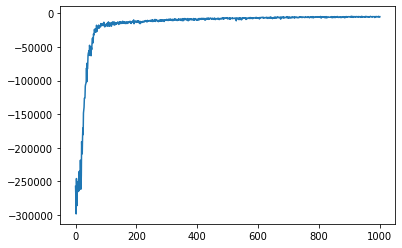

In [5]:
trainer.plot()

Run the cell below to open the tensorboard logs. If necessary, replace the path with the one leading to the log folder of your experiment

In [ ]:
%load_ext tensorboard
%tensorboard --logdir rl-models/ControlBurgersBench3/tensorboard-log

Now we can take a look at how the agent is performing:

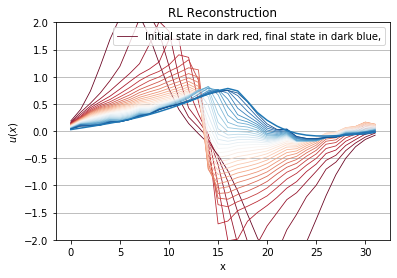

In [7]:
env = trainer.env

obs = env.reset()
bplt.burgers_figure('RL Reconstruction')
plt.plot(obs[0][:,0], color=bplt.gradient_color(0, step_count+1), linewidth=0.8)
plt.legend(['Initial state in dark red, final state in dark blue,'])
plt.ylim(-2, 2)
for frame in range(1, step_count):
    act = trainer.predict(obs, deterministic=True)
    obs, _, _, _ = env.step(act)
    plt.plot(obs[0][:,0], color=bplt.gradient_color(frame, step_count+1), linewidth=0.8)
plt.plot(env.goal_state.velocity.data[0,:,0])